## Classification Models

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB

In [17]:
matHealth = pd.read_csv('./health_outcomes.csv')
matHealth.head()


,County,MICH-01_2015-2019,MICH-02_2015-2019,MICH-03_2015-2019,MICH-06_2015-2019,MICH-07_2015-2019,MICH-08_2015-2019,MICH-10_2015-2019,MICH-13_2015-2019,MetGoals_Reached
0,Pennsylvania,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0
1,Adams,4.7,4.7,4.7,4.7,4.7,4.7,4.7,4.7,1
2,Allegheny,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,0
3,Armstrong,6.3,6.3,6.3,6.3,6.3,6.3,6.3,6.3,0
4,Beaver,7.2,7.2,7.2,7.2,7.2,7.2,7.2,7.2,0


In [18]:
matHealth['MetGoals_Reached'].value_counts()

0      38
1      15
DSU    15
Name: MetGoals_Reached, dtype: int64

In [33]:
df = matHealth.sample(frac=2, random_state=123, replace = True)
y_outcome = df[df['MetGoals_Reached'] == '1'].sample(frac=1.25, random_state=123, replace=True).reset_index(False)
dsu_outcome = df[df['MetGoals_Reached'] == 'DSU'].sample(frac=1.5, random_state = 123, replace=True).reset_index(False)
df = pd.concat([df, y_outcome, dsu_outcome], ignore_index=True).drop(columns='index')
df.shape

(216, 10)

In [34]:
df['MetGoals_Reached'].value_counts()

0      77
1      74
DSU    65
Name: MetGoals_Reached, dtype: int64

## KNN Classifier

In [43]:
outcomes = df[df.MetGoals_Reached != 'DSU']

In [44]:
data = outcomes.columns[1:9]
target = outcomes.columns[9]

In [45]:
X = outcomes[data]
y = outcomes[target]
y=y.astype('int')
                     
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=60)
  
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(X_train, y_train)                                    
print(knn.predict(X_test))

[0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0
 1 0 0 1 1 0 0 0 1]


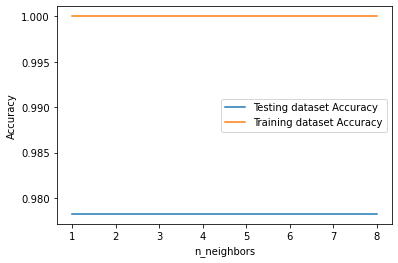

In [46]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

## Cluster Plots & Naive Bayes

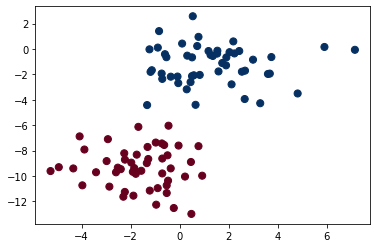

In [47]:
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [48]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [49]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9782608695652174


In [50]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

<AxesSubplot:>

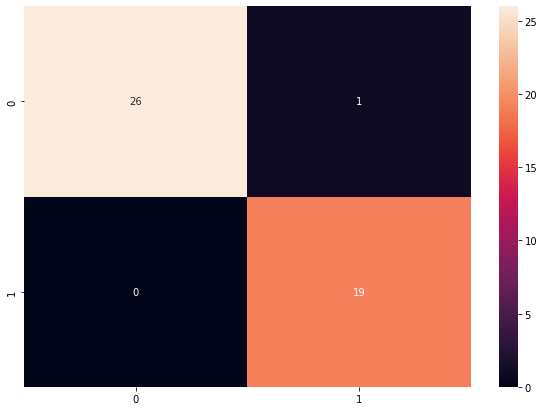

In [51]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)